In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os

<h2> Task 2 (Predictive Modelling)

In [582]:
df = pd.read_csv('X_data.csv', sep = ';')
train = pd.read_csv('Y_train.csv', sep = ';')
test = pd.read_csv('Y_submit.csv', sep = ';')

In [583]:
df.head()

,Unnamed: 0,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [584]:
# make the dataframe in the desired format and set index
df['timestamp'] = df['Unnamed: 0']
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').drop('Unnamed: 0', axis = 1)

In [585]:
df.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
timestamp,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2103841 entries, 2015-01-01 00:00:00 to 2019-01-01 00:00:00
Data columns (total 17 columns):
 #   Column      Dtype  
---  ------      -----  
 0   T_data_1_1  int64  
 1   T_data_1_2  int64  
 2   T_data_1_3  int64  
 3   T_data_2_1  int64  
 4   T_data_2_2  int64  
 5   T_data_2_3  int64  
 6   T_data_3_1  int64  
 7   T_data_3_2  int64  
 8   T_data_3_3  int64  
 9   T_data_4_1  int64  
 10  T_data_4_2  int64  
 11  T_data_4_3  int64  
 12  T_data_5_1  int64  
 13  T_data_5_2  int64  
 14  T_data_5_3  int64  
 15  H_data      float64
 16  AH_data     float64
dtypes: float64(2), int64(15)
memory usage: 288.9 MB


In [587]:
# check for nans
df.isna().sum()

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64

In [588]:
# move the row down from heading in train target dataframe
train = pd.DataFrame(np.insert(train.values, 0, values = ['2015-01-04 00:05:00', 392], axis = 0), columns = ['timestamp', 'target'])
train['timestamp'] = pd.to_datetime(train['timestamp'])
train = train.set_index('timestamp')

In [589]:
# move the row down from heading in test target dataframe
test = pd.DataFrame(np.insert(test.values, 0, values = ['2018-05-04 00:05:00', 420], axis = 0), columns = ['timestamp', 'target'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
test = test.set_index('timestamp')

In [590]:
# concatenate train and test target columns
target = pd.concat([train, test])

In [591]:
# merge two dataframes based on index/timestamp
df = pd.merge(df, target, left_index = True, right_index = True)

In [592]:
# convert to dtypes as required
df['target'] = df['target'].astype(int)

In [593]:
# set MAE and MAPE metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

def mae(y_true, y_pred):
    '''This metric is stated in task description'''
    return mean_absolute_error(y_true, y_pred)

def mape(y_true, y_pred): 
    '''This metric is used for my internal validation to understand the size of error in percentage'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAE = make_scorer(mae, greater_is_better = False)

MAPE = make_scorer(mape, greater_is_better = False)

In [594]:
#parse timestamp as new features
df['timestamp'] = df.index

df['hour'] = df.timestamp.dt.hour
df['day'] = df.timestamp.dt.day
df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year

In [595]:
# create train and test dataframes
tr = df.iloc[:train.shape[0], :]
ts = df.iloc[train.shape[0]:, :]

In [596]:
tr.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,...,T_data_5_2,T_data_5_3,H_data,AH_data,target,timestamp,hour,day,month,year
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-04 00:05:00,277,326,273,322,335,352,505,501,670,326,...,236,242,153.77,7.90,392,2015-01-04 00:05:00,0,4,1,2015
2015-01-04 01:05:00,277,253,272,320,333,355,500,501,687,337,...,242,230,158.27,6.96,384,2015-01-04 01:05:00,1,4,1,2015
2015-01-04 02:05:00,262,218,260,326,336,330,505,499,443,347,...,251,240,153.36,7.29,393,2015-01-04 02:05:00,2,4,1,2015
2015-01-04 03:05:00,243,238,252,327,329,308,520,498,540,342,...,258,246,153.21,7.11,399,2015-01-04 03:05:00,3,4,1,2015
2015-01-04 04:05:00,236,238,245,323,320,318,522,501,524,343,...,263,265,195.71,7.97,400,2015-01-04 04:05:00,4,4,1,2015


In [597]:
# create features as average for each meter type for train
tr['mean_T_data_1'] = tr.loc[: , 'T_data_1_1' : 'T_data_1_3'].mean(axis = 1)
tr['mean_T_data_2'] = tr.loc[: , 'T_data_2_1' : 'T_data_2_3'].mean(axis = 1)
tr['mean_T_data_3'] = tr.loc[: , 'T_data_3_1' : 'T_data_3_3'].mean(axis = 1)
tr['mean_T_data_4'] = tr.loc[: , 'T_data_4_1' : 'T_data_4_3'].mean(axis = 1)
tr['mean_T_data_5'] = tr.loc[: , 'T_data_5_1' : 'T_data_5_3'].mean(axis = 1)
tr['mean_of_all_meters'] = tr.iloc[: , :15].mean(axis = 1)

# create features as average for each meter type for test
ts['mean_T_data_1'] = ts.loc[: , 'T_data_1_1' : 'T_data_1_3'].mean(axis = 1)
ts['mean_T_data_2'] = ts.loc[: , 'T_data_1_1' : 'T_data_1_3'].mean(axis = 1)
ts['mean_T_data_3'] = ts.loc[: , 'T_data_1_1' : 'T_data_1_3'].mean(axis = 1)
ts['mean_T_data_4'] = ts.loc[: , 'T_data_1_1' : 'T_data_1_3'].mean(axis = 1)
ts['mean_T_data_5'] = ts.loc[: , 'T_data_1_1' : 'T_data_1_3'].mean(axis = 1)
ts['mean_of_all_meters'] = ts.iloc[: , :15].mean(axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [598]:
# create target statistics grouped by hour 
for c in ['hour']:   
    d = {}
    
    d['mean_' + c] = tr.groupby([c])['target'].mean()
    d['median_' + c] = tr.groupby([c])['target'].median()
    d['max_' + c] = tr.groupby([c])['target'].max()
    d['min_' + c] = tr.groupby([c])['target'].min()
    d['std_' + c] = tr.groupby([c])['target'].std()

    for v in d:
        tr[v] = tr[c].map(d[v].to_dict())
        ts[v] = ts[c].map(d[v].to_dict())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [599]:
X = tr.drop(['target', 'timestamp', 'hour'], axis = 1)
y = tr.target
X_test = ts.drop(['target', 'timestamp', 'hour'], axis = 1)

In [600]:
X.shape, X_test.shape, y.shape

((29184, 31), (5808, 31), (29184,))

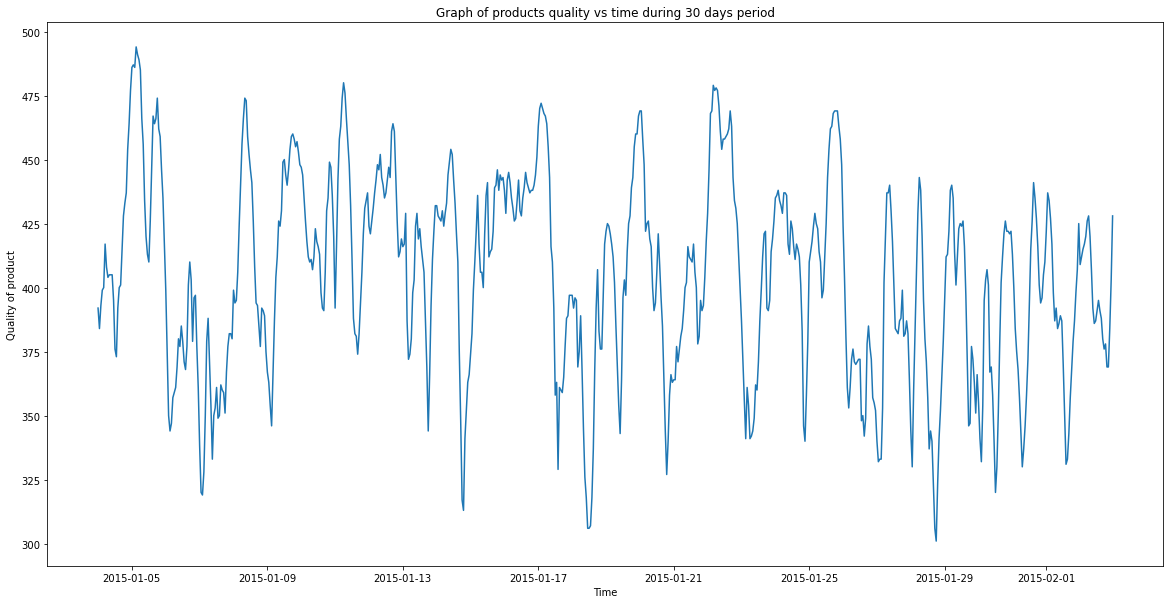

In [558]:
# plot the graph of target to understand the pattern 
plt.figure(figsize = (20, 10))
plt.plot(y[:720])
plt.xlabel('Time')
plt.ylabel('Quality of product')
plt.title('Graph of products quality vs time during 30 days period')
plt.show()

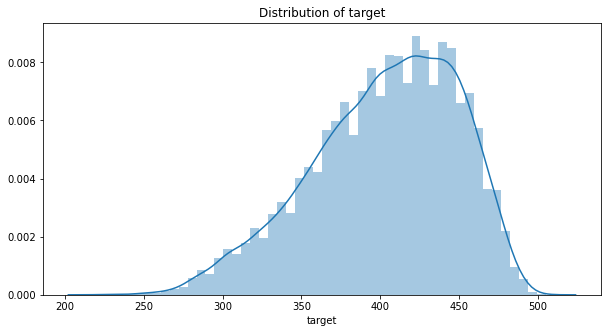

In [559]:
# distribution of target 
plt.figure(figsize = (10, 5))
sns.distplot(y)
plt.title('Distribution of target')
plt.show()

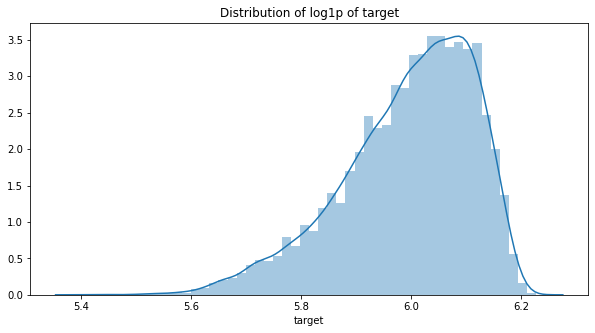

In [560]:
# distribution log1p of target 
plt.figure(figsize = (10, 5))
sns.distplot(np.log1p(y))
plt.title('Distribution of log1p of target')
plt.show()

Let's look at the correlation between features and our target using heatmap.

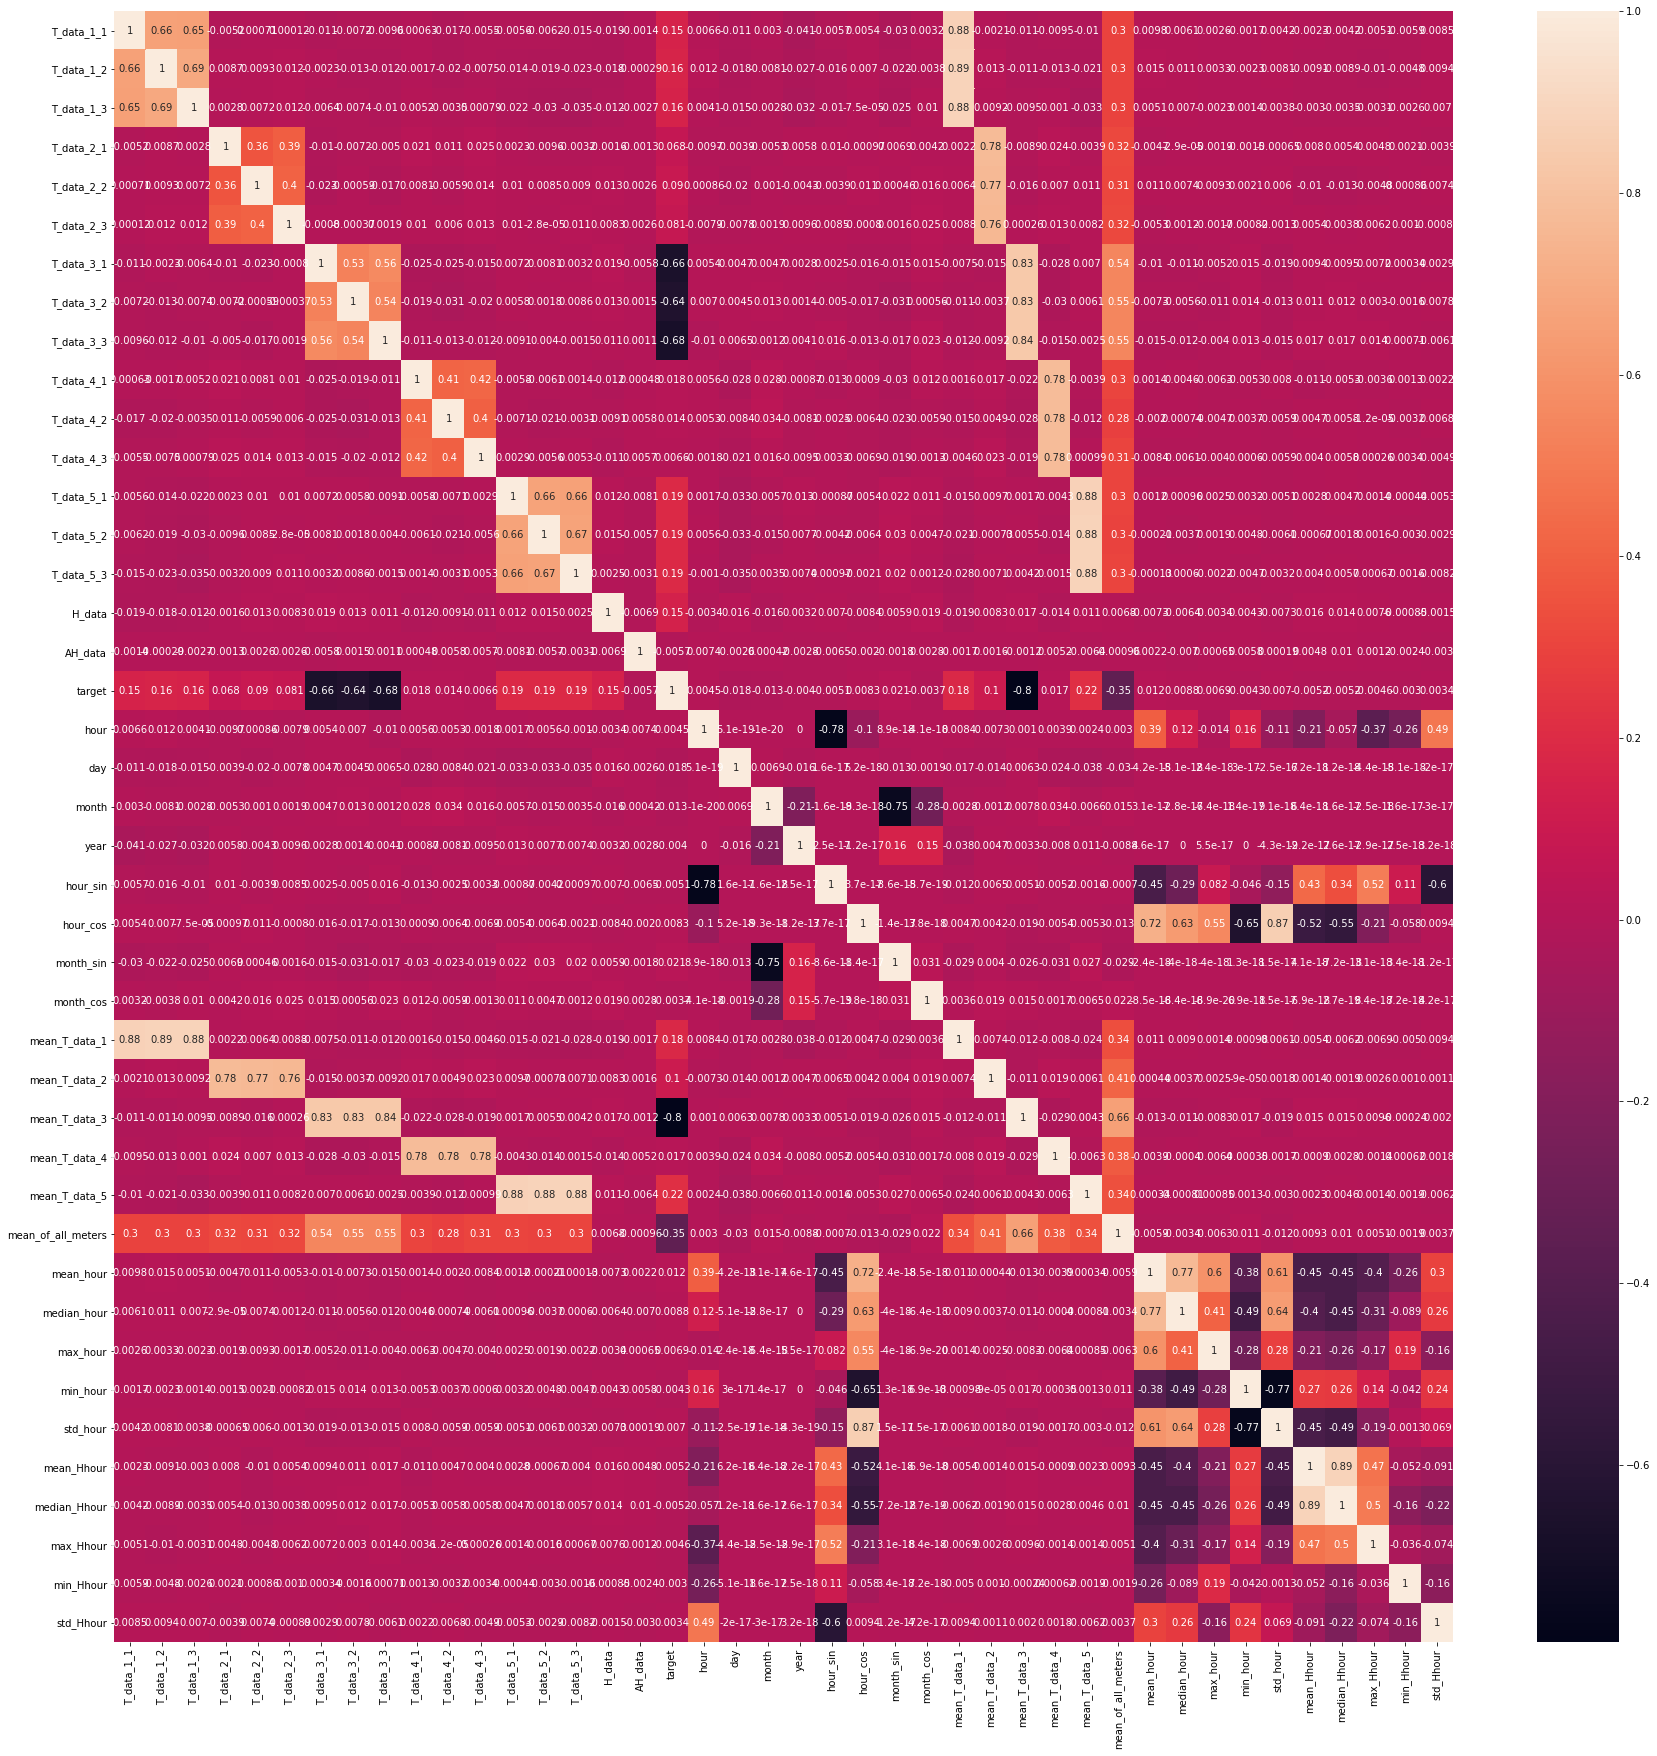

In [561]:
plt.figure(figsize = (30, 30))
sns.heatmap(tr.corr(), annot = True)
plt.show()

<h2> Using OLS to check R-squared, coefficients and p-values of features 

In [601]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.model_selection import KFold, train_test_split, TimeSeriesSplit, RepeatedKFold, StratifiedKFold, StratifiedShuffleSplit

if 'const' not in X.columns:
    X = sm.add_constant(X)
    
model = sm.OLS(y, X)
results = model.fit()

print('R2: ', round(results.rsquared, 3))
print('R2 adj: ', round(results.rsquared_adj, 3))
print('gap between R2 and adj R2: ', round(results.rsquared - results.rsquared_adj, 3)) 
print('\n')


print(results.summary())

R2:  0.749
R2 adj:  0.749
gap between R2 and adj R2:  0.0


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     3480.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:33:30   Log-Likelihood:            -1.3315e+05
No. Observations:               29184   AIC:                         2.664e+05
Df Residuals:                   29158   BIC:                         2.666e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [602]:
X = X.drop('const', axis = 1)

<h2> Naive forecasting 

Let's do naive forecast saying that the value of target next hour will be previous hour by shifting the real target by 1 and then calculate the error. This will give us the sense while doing models and see if we can beat the naive forecast. 

In [564]:
Y = pd.DataFrame()
Y['target'] = tr.target
Y['naive_forecast'] = tr.target.shift(1)
Y = Y.dropna()

In [565]:
# let's check MAE for naive forecast 
print('MAE for naive forecast: {:.4f}'.format(mae(Y['target'], Y['naive_forecast'])))

MAE for naive forecast: 9.5116


<h2> Linear Regression model

In [566]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold, train_test_split, TimeSeriesSplit, RepeatedKFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

model = LinearRegression()

kf = TimeSeriesSplit(n_splits = 5)

scores = cross_val_score(model, X, y, scoring = MAE, cv = kf)
print(f'Cross-validation scores: {scores}')

print(f'Mean score: {np.round(scores.mean(), 4)}')
print(f'Mean std: {np.round(scores.std(), 4)}')

<h2> CatBoost model

In [603]:
from catboost import Pool
import catboost as cb
from catboost import CatBoostRegressor

cat_features = np.where(X.dtypes == 'object')[0]

seed = 2020

params = {'eval_metric' : 'MAE',
          'learning_rate' : 0.05,
          'iterations' : 2000,
          'l2_leaf_reg' : 5,
          'random_seed' : seed,
          'depth' : 6,
          'early_stopping_rounds' : 100,
          'use_best_model' : True
         }

n_fold = 5

kf = TimeSeriesSplit(n_splits = n_fold)

test_data = Pool(data = X_test, cat_features = cat_features)

scores = []

prediction = np.zeros(X_test.shape[0])

for fold_n, (train_index, valid_index) in enumerate(kf.split(X, y)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] 
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    train_data = Pool(data = X_train, label = y_train, cat_features = cat_features)
    valid_data = Pool(data = X_valid, label = y_valid, cat_features = cat_features)
    test_data = Pool(data = X_test, cat_features = cat_features)

    model = CatBoostRegressor(**params)
    model.fit(train_data, eval_set = valid_data)
    
    score = model.get_best_score()['validation']['MAE']
    scores.append(score)

    y_pred = model.predict(test_data)
    prediction += y_pred

prediction /= n_fold

print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

0:	learn: 35.7143888	test: 34.8242071	best: 34.8242071 (0)	total: 6.27ms	remaining: 12.5s
1:	learn: 34.4034549	test: 33.5816514	best: 33.5816514 (1)	total: 12ms	remaining: 12s
2:	learn: 33.1891924	test: 32.4396946	best: 32.4396946 (2)	total: 17.1ms	remaining: 11.4s
3:	learn: 31.9992410	test: 31.2779746	best: 31.2779746 (3)	total: 22.1ms	remaining: 11s
4:	learn: 30.8913079	test: 30.2261235	best: 30.2261235 (4)	total: 27.2ms	remaining: 10.8s
5:	learn: 29.7718326	test: 29.1696978	best: 29.1696978 (5)	total: 32.1ms	remaining: 10.7s
6:	learn: 28.7569433	test: 28.1971021	best: 28.1971021 (6)	total: 37.2ms	remaining: 10.6s
7:	learn: 27.8011800	test: 27.2999367	best: 27.2999367 (7)	total: 42.3ms	remaining: 10.5s
8:	learn: 26.9207877	test: 26.4801652	best: 26.4801652 (8)	total: 47.3ms	remaining: 10.5s
9:	learn: 26.0399493	test: 25.6606035	best: 25.6606035 (9)	total: 52.3ms	remaining: 10.4s
10:	learn: 25.2575480	test: 24.9411147	best: 24.9411147 (10)	total: 57.2ms	remaining: 10.3s
11:	learn: 24.

Text(0.5, 1.0, 'CatBoost Feature Importance')

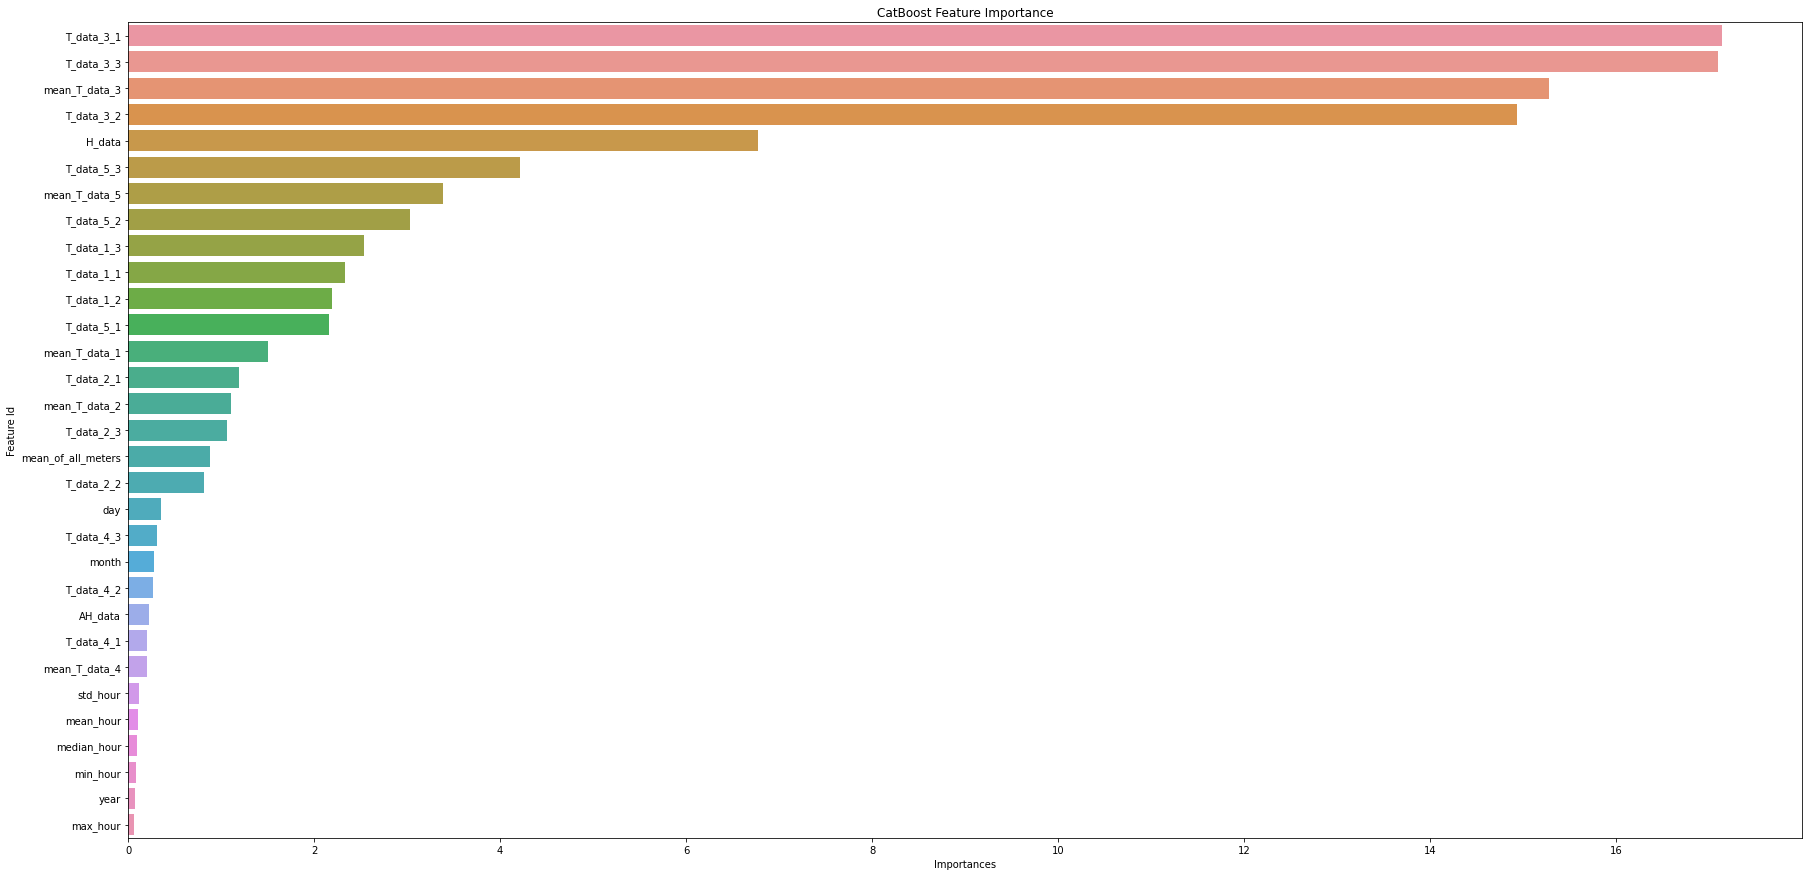

In [604]:
feature_importance_df = model.get_feature_importance(prettified = True)
plt.figure(figsize = (30, 15))
sns.barplot(x = 'Importances', y = 'Feature Id', data = feature_importance_df)
plt.title('CatBoost Feature Importance')

<h2> LightGBM model

In [605]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

params_lgb = {
   
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mae'],
    'learning_rate': 0.05,
    'feature_fraction': 0.95,
    'bagging_fraction': 0.95,
    'bagging_freq': 5,
    'verbose': 1,
    "max_depth": 7,
    "num_leaves": 20,
    "seed": seed

    }

scores = []
n_fold = 5
kf = TimeSeriesSplit(n_splits = n_fold)

predictions = np.zeros(X_test.shape[0])
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(kf.split(X, y)):
   
    print("Fold {}".format(fold_))
    
    trn_data = lgb.Dataset(X.iloc[trn_idx], label = y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label = y.iloc[val_idx])

    num_round = 1000000
    lgbm = lgb.train(params_lgb, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval = 1000, early_stopping_rounds = 100)
    predictions_val = lgbm.predict(X.iloc[val_idx], num_iteration = lgbm.best_iteration)
    
    score = mae(predictions_val, y.iloc[val_idx])
    scores.append(score)
    
    print("CV score: {:<8.5f}".format(mae(predictions_val, y.iloc[val_idx])))
    
    predictions += lgbm.predict(X_test, num_iteration = lgbm.best_iteration) / kf.n_splits
    
print('CV mean: {:.6f}, CV std: {:.6f}'.format(np.mean(scores), np.std(scores)))

Fold 0
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[595]	training's l1: 4.78689	valid_1's l1: 11.3955
CV score: 11.39549
Fold 1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[450]	training's l1: 7.12878	valid_1's l1: 10.9528
CV score: 10.95276
Fold 2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[609]	training's l1: 7.41674	valid_1's l1: 10.2084
CV score: 10.20839
Fold 3
Training until validation scores don't improve for 100 rounds
[1000]	training's l1: 6.86552	valid_1's l1: 10.1594
Early stopping, best iteration is:
[1064]	training's l1: 6.72542	valid_1's l1: 10.1433
CV score: 10.14331
Fold 4
Training until validation scores don't improve for 100 rounds
[1000]	training's l1: 7.25164	valid_1's l1: 10.4676
Early stopping, best iteration is:
[1511]	training's l1: 6.36326	valid_1's l1: 10.4209
CV score: 10.42091
CV mean: 10.624171, CV s

<h2> XGBoost

In [479]:
import xgboost as xgb 

params_xgb = {'colsample_bytree' : 1,
          'gamma' : 0, 
          'eval_metric' : 'mae',
          'eta' : 0.05,
          'max_depth' : 6,
          'min_child_weight' : 2,
          'n_estimators' : 10000,                                                                   
          'nthread' : 4,
          'subsample' : 0.9,
          'seed' : seed
         }



scores = []
n_fold = 5
kf = TimeSeriesSplit(n_splits = n_fold)

predictions = np.zeros(X_test.shape[0])
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(kf.split(X, y)):
   
    print("Fold {}".format(fold_))
        
    X_train, X_valid = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_valid = y.iloc[trn_idx], y.iloc[val_idx]

    xb = xgb.XGBRegressor(**params_xgb)
    xb.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_valid, y_valid)], early_stopping_rounds = 100)
    best_iter = xb.best_iteration
    predictions_val = xb.predict(X_valid, ntree_limit = best_iter)
    
    score = mae(predictions_val, y_valid)
    scores.append(score)
    
    print("CV score: {:<8.5f}".format(mae(predictions_val, y_valid)))
        
print('CV mean: {:.6f}, CV std: {:.6f}'.format(np.mean(scores), np.std(scores)))

Fold 0
[16:49:31] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:384.31192	validation_1-mae:380.72046
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[1]	validation_0-mae:365.12674	validation_1-mae:361.69165
[2]	validation_0-mae:346.89597	validation_1-mae:343.58765
[3]	validation_0-mae:329.56958	validation_1-mae:326.37250
[4]	validation_0-mae:313.10840	validation_1-mae:310.03436
[5]	validation_0-mae:297.47324	validation_1-mae:294.52292
[6]	validation_0-mae:282.63245	validation_1-mae:279.79334
[7]	validation_0-mae:268.52377	validation_1-mae:265.79071
[8]	validation_0-mae:255.11636	validation_1-mae:252.47717
[9]	validation_0-mae:242.38078	validation_1-mae:239.83763
[10]	validation_0-mae:230.28624	validation_1-mae:227.83350
[11]	validation_0-mae:218.79065	validation_1-mae:216.42322
[12]	valid

<h2> CatBoost with train_test_split

In [606]:
# create train and valid set 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, shuffle = False, random_state = seed)

In [607]:
# catboost predictions
params = {'eval_metric' : 'MAE',
          'learning_rate' : 0.05,
          'iterations' : 5000,
          'l2_leaf_reg' : 5,
          'random_seed' : seed,
          'depth' : 6,
          'early_stopping_rounds' : 100,
          'use_best_model' : True
         }
         
cb = CatBoostRegressor(**params)
cb.fit(X_train, y_train, eval_set = (X_valid, y_valid))
pred_catboost = cb.predict(X_valid)
print('MAE of CatBoost: {:.4f}'.format(mae(y_valid, pred_catboost)))

0:	learn: 36.2052979	test: 36.7573026	best: 36.7573026 (0)	total: 11.8ms	remaining: 59.1s
1:	learn: 34.8178570	test: 35.3889073	best: 35.3889073 (1)	total: 22.2ms	remaining: 55.4s
2:	learn: 33.5206321	test: 34.1037467	best: 34.1037467 (2)	total: 32.2ms	remaining: 53.7s
3:	learn: 32.2866160	test: 32.8794944	best: 32.8794944 (3)	total: 42.6ms	remaining: 53.2s
4:	learn: 31.1470011	test: 31.7656501	best: 31.7656501 (4)	total: 52.7ms	remaining: 52.7s
5:	learn: 30.0888208	test: 30.7190216	best: 30.7190216 (5)	total: 62.3ms	remaining: 51.9s
6:	learn: 29.0807947	test: 29.7153223	best: 29.7153223 (6)	total: 71.8ms	remaining: 51.2s
7:	learn: 28.0793513	test: 28.7190111	best: 28.7190111 (7)	total: 81.4ms	remaining: 50.8s
8:	learn: 27.2122570	test: 27.8500143	best: 27.8500143 (8)	total: 91ms	remaining: 50.5s
9:	learn: 26.3294879	test: 26.9545071	best: 26.9545071 (9)	total: 101ms	remaining: 50.2s
10:	learn: 25.5278409	test: 26.1542708	best: 26.1542708 (10)	total: 110ms	remaining: 50s
11:	learn: 24.

<h2> CatBoost using all data for training

As I cannot validate my predictions on real test target so I have decided to train the model using the whole dataset not loosing any data which is especially important when having time series data. CatBoost was better than other models and it usually works fine with default parameters therefore I have chosen it for my forecasting. Using cross-validation approach helped to choose the optimum number of iterations. 

In [608]:
cat_features = np.where(X.dtypes == 'object')[0]

params = {'eval_metric' : 'MAE',
          'learning_rate' : 0.05,
          'iterations' : 3000,
          'l2_leaf_reg' : 5,
          'random_seed' : seed,
          'depth' : 6
         }

model = CatBoostRegressor(**params)

model.fit(X, y)
preds = model.predict(X_test)

0:	learn: 36.3342225	total: 12.5ms	remaining: 37.6s
1:	learn: 34.9478779	total: 23.8ms	remaining: 35.6s
2:	learn: 33.6551073	total: 34.9ms	remaining: 34.9s
3:	learn: 32.4826496	total: 44.9ms	remaining: 33.6s
4:	learn: 31.3514722	total: 55.1ms	remaining: 33s
5:	learn: 30.2837520	total: 65.6ms	remaining: 32.7s
6:	learn: 29.2748499	total: 75.7ms	remaining: 32.3s
7:	learn: 28.2673293	total: 85.8ms	remaining: 32.1s
8:	learn: 27.3875532	total: 95.8ms	remaining: 31.8s
9:	learn: 26.4864664	total: 106ms	remaining: 31.6s
10:	learn: 25.6422230	total: 116ms	remaining: 31.4s
11:	learn: 24.8469039	total: 126ms	remaining: 31.3s
12:	learn: 24.1027235	total: 136ms	remaining: 31.3s
13:	learn: 23.3871347	total: 146ms	remaining: 31.2s
14:	learn: 22.7263530	total: 157ms	remaining: 31.2s
15:	learn: 22.0949058	total: 167ms	remaining: 31.1s
16:	learn: 21.5156177	total: 177ms	remaining: 31.1s
17:	learn: 20.9585912	total: 187ms	remaining: 31s
18:	learn: 20.4218640	total: 197ms	remaining: 30.9s
19:	learn: 19.931

<h2> Create .csv file with predictions

In [609]:
# insert predictions and make csv
test['target'] = preds
test.to_csv('Predictions_Task_2.csv', index = False)

In [610]:
test.target.mean()

411.02447236883506

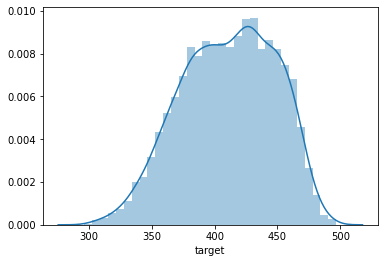

In [611]:
sns.distplot(test.target)

<h2> Conclusion

We managed to get MAE of 10.0689 using CatBoost without hyperparameters tuning and using Time Series Split scheme for cross-validation. It is worth to mention that KFold gave a better result i.e. MAE of ~ 9.2995 but in that case we have data leakage (looking into the future) which is not right for the time series data validation. 
Also, feature engineering did not help much to reduce the error. 

I tried three models: Linear Regression, CatBoost, LightGBM and XGBoost. CatBoost gave the best score out of these four models. 

What I did not try or did not help:
*  Did not try Stacking and Blending. 
*  Did not try ensemble of these models using SciPy library for its weight optimization.
*  Did not try NN as it usually works worse for this type of tasks. 
*  Standartization / Normalization did not help as expected. 
*  Polynomial features and different feature interactions did not help.

Also, all described tricks are fine for competitions when the score can be improved by 0.001 - 0.01 but for production purpose this is useless. 